# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link: https://youtu.be/LMQZRh2KXkU


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [62]:
import pandas as pd
import numpy as np
def data_parser(input_csv):
  hospitals = pd.read_csv(input_csv)
  hospitals['Payment Denial Start Date'] = hospitals['Payment Denial Start Date'].fillna("Not Applicable")
  hospitals['Payment Denial Length in Days'] = hospitals['Payment Denial Length in Days'].fillna("Not Applicable")
  hospitals['ZIP Code'] = hospitals['ZIP Code'].astype(str)
  hospitals['ZIP Code'] = hospitals['ZIP Code'].str.zfill(5)
  hospitals.to_csv('NH_Penalties_Cleaned.csv', index = True)
  return hospitals






############ Function Call ############
data_parser("NH_Penalties.csv")


,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Penalty Date,Penalty Type,Fine Amount,Payment Denial Start Date,Payment Denial Length in Days,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2023-03-02,Fine,23989.0,Not Applicable,Not Applicable,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2025-09-01
1,015019,MERRY WOOD LODGE,280 MT HEBRON ROAD,ELMORE,AL,36025,2024-09-01,Fine,182969.0,Not Applicable,Not Applicable,"280 MT HEBRON ROAD,ELMORE,AL,36025",2025-09-01
2,015019,MERRY WOOD LODGE,280 MT HEBRON ROAD,ELMORE,AL,36025,2024-09-01,Payment Denial,NaN,2024-10-01,42.0,"280 MT HEBRON ROAD,ELMORE,AL,36025",2025-09-01
3,015032,DIVERSICARE OF FOLEY,1701 NORTH ALSTON STREET,FOLEY,AL,36535,2023-06-19,Fine,10065.0,Not Applicable,Not Applicable,"1701 NORTH ALSTON STREET,FOLEY,AL,36535",2025-09-01
4,015048,CULLMAN HEALTH CARE CENTER,1607 MAIN AVE NE,CULLMAN,AL,35055,2023-10-19,Fine,26982.0,Not Applicable,Not Applicable,"1607 MAIN AVE NE,CULLMAN,AL,35055",2025-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20754,745040,THE SARAH ROBERTS FRENCH HOME,1315 TEXAS AVE,SAN ANTONIO,TX,78201,2022-12-19,Fine,4580.0,Not Applicable,Not Applicable,"1315 TEXAS AVE,SAN ANTONIO,TX,78201",2025-09-01
20755,745040,THE SARAH ROBERTS FRENCH HOME,1315 TEXAS AVE,SAN ANTONIO,TX,78201,2022-12-12,Fine,4580.0,Not Applicable,Not Applicable,"1315 TEXAS AVE,SAN ANTONIO,TX,78201",2025-09-01
20756,745040,THE SARAH ROBERTS FRENCH HOME,1315 TEXAS AVE,SAN ANTONIO,TX,78201,2022-12-05,Fine,4580.0,Not Applicable,Not Applicable,"1315 TEXAS AVE,SAN ANTONIO,TX,78201",2025-09-01
20757,745040,THE SARAH ROBERTS FRENCH HOME,1315 TEXAS AVE,SAN ANTONIO,TX,78201,2022-11-07,Fine,10568.0,Not Applicable,Not Applicable,"1315 TEXAS AVE,SAN ANTONIO,TX,78201",2025-09-01


## Web Collection Requirement \#1


In [63]:
def web_parser1():
    import os
    import time
    import pandas as pd
    import chromedriver_autoinstaller
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.chrome.options import Options
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.support.ui import WebDriverWait, Select
    from selenium.webdriver.support import expected_conditions as EC

    Chrome_Path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"
    Chromedriver_Path = "/opt/anaconda3/lib/python3.13/site-packages/chromedriver_autoinstaller/141/chromedriver"
    url = "https://data.bls.gov/oes/#/home"
    Occupation_Text = "Medical and Health Services Managers"
    Metropolitan_Text = "Metropolitan or Non Metropolitan Area"
    Area_Text = "All MSA in this list"
    Datatype_Text = "All data types"
    Output_Text = "HTML"
    Default_Wait = 30

    def make_driver(headless=False):
        chromedriver_autoinstaller.install()
        service = Service(executable_path=Chromedriver_Path)
        driver = webdriver.Chrome(service=service)
        return driver

    def select_search_type_and_wait(driver):
        driver.get(url)
        WebDriverWait(driver, Default_Wait).until(EC.presence_of_element_located((By.XPATH, "//input[@type='radio']")))
        all_radios = driver.find_elements(By.XPATH, "//input[@type='radio']")
        for radio in all_radios:
            if "one occupation" in radio.get_attribute("id").lower() and "multiple geographical" in radio.get_attribute("id").lower():
                driver.execute_script("arguments[0].click();", radio)
                break
        time.sleep(5)

    def pick_occupation(driver):
        driver.execute_script("window.scrollTo(0, 400);")
        time.sleep(2)
        all_occupation_elements = driver.find_elements(
        By.XPATH, "//*[contains(text(), 'Medical and Health Services Managers')]")
        for elem in all_occupation_elements:
            text = elem.text.strip()
            if Occupation_Text in text:
                driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", elem)
                time.sleep(0.5)
                elem.click()
                break
        time.sleep(3)

    def pick_geotype(driver):
        time.sleep(2)
        all_radios = driver.find_elements(By.XPATH, "//input[@type='radio']")
        for radio in all_radios:
            if Metropolitan_Text.lower() in radio.get_attribute("id").lower() and radio.is_displayed():
                driver.execute_script("arguments[0].scrollIntoView(true);", radio)
                time.sleep(0.5)
                driver.execute_script("arguments[0].click();", radio)
                break

    def pick_area(driver):
        wait = WebDriverWait(driver, Default_Wait)
        driver.execute_script("window.scrollTo(0, 800);")
        time.sleep(1)
        area_select_el = wait.until(EC.presence_of_element_located((By.XPATH, "//label[contains(text(), 'Select one or more areas')]/following::select[9]")))
        area_select = Select(area_select_el)
        area_select.select_by_visible_text(Area_Text)
        next_btn = wait.until(EC.element_to_be_clickable((By.XPATH, "(//button[contains(text(), 'Next')])[5]")))
        driver.execute_script("arguments[0].scrollIntoView({block:'center'});", next_btn)
        time.sleep(0.5)
        next_btn.click()
        time.sleep(3)

    def pick_datatypes(driver):
        all_selects = driver.find_elements(By.XPATH, "//select")
        for sel in all_selects:
            sel_obj = Select(sel)
            for opt in sel_obj.options:
                if Datatype_Text in opt.text:
                    sel_obj.select_by_visible_text(opt.text)
                    break
        time.sleep(1)
        next_btn = driver.find_element(By.XPATH, "(//button[contains(text(), 'Next')])[6]")
        driver.execute_script("arguments[0].scrollIntoView(true);", next_btn)
        time.sleep(0.5)
        next_btn.click()
        time.sleep(3)

    def pick_release_and_output_and_submit(driver):
        all_selects = driver.find_elements(By.XPATH, "//select")
        release_select = None
        output_select = None
        for sel in all_selects:
            sel_obj = Select(sel)
            if len(sel_obj.options) > 0:  
                if "2024" in sel_obj.options[0].text:
                    release_select = sel
                if "HTML" in sel_obj.options[0].text:
                    output_select = sel
        if release_select:
            release_select_obj = Select(release_select)
            release_select_obj.select_by_index(0)
        if output_select:
            output_select_obj = Select(output_select)
            output_select_obj.select_by_visible_text(Output_Text)
        time.sleep(1)
        submit_btn = driver.find_element(By.XPATH, "(//button[contains(text(), 'Submit')])[2]")
        driver.execute_script("arguments[0].scrollIntoView(true);", submit_btn)
        time.sleep(0.5)
        submit_btn.click()
        time.sleep(5)

    def scrape_table_after_submit(driver):
        table_el = WebDriverWait(driver, Default_Wait * 2).until(
            EC.presence_of_element_located((By.XPATH, "//table[contains(@class, 'regular') and contains(@class, 'ng-scope')]"))
        )
        time.sleep(5)
        rows = table_el.find_elements(By.TAG_NAME, "tr")
        header_cells = rows[0].find_elements(By.TAG_NAME, "th")
        headers = [h.text.strip() for h in header_cells]
        data_rows = []
        for r in rows[1:-2]:
            tds = r.find_elements(By.TAG_NAME, "td")
            ths = r.find_elements(By.TAG_NAME, "th")
            if tds:
                data_rows.append([th.text.strip() for th in ths] + [td.text.strip() for td in tds])
        df = pd.DataFrame(data_rows, columns=headers)
        df['Hourly mean wage']=df['Hourly mean wage'].str.replace("$","")
        df['Annual mean wage (2)']=df['Annual mean wage (2)'].str.replace("$","")
        df['Hourly median wage']=df['Hourly median wage'].str.replace("$","")
        df['Annual median wage (2)']=df['Annual median wage (2)'].str.replace("$","")
        df.drop('Hourly 10th percentile wage', axis = 1,inplace = True)
        df.drop('Hourly 25th percentile wage', axis = 1,inplace = True)
        df.drop('Hourly 75th percentile wage', axis = 1,inplace = True)
        df.drop('Hourly 90th percentile wage', axis = 1,inplace = True)
        df.drop('Employment percent relative standard error (3)', axis = 1,inplace = True)
        df.drop('Wage percent relative standard error (3)', axis = 1,inplace = True)
        df.drop('Annual 10th percentile wage (2)', axis = 1,inplace = True)
        df.drop('Annual 25th percentile wage (2)', axis = 1,inplace = True)
        df.drop('Annual 75th percentile wage (2)', axis = 1,inplace = True)
        df.drop('Annual 90th percentile wage (2)', axis = 1,inplace = True)
        return df

    driver = make_driver(headless=False)
    select_search_type_and_wait(driver)
    pick_occupation(driver)
    pick_geotype(driver)
    pick_area(driver)
    pick_datatypes(driver)
    pick_release_and_output_and_submit(driver)
    df = scrape_table_after_submit(driver)
    df.to_csv("ws_code_cleaned.csv", index=False)
    driver.quit()
    return df

    
############ Function Call ############
web_parser1()

,Area name,Employment (1),Hourly mean wage,Annual mean wage (2),Hourly median wage,Annual median wage (2),"Employment per 1,000 jobs",Location Quotient
0,"Abilene, TX (00-10180)",460,54.17,"112,670",48.84,"101,590",6.214,1.69
1,"Aguadilla, PR (00-10380)",40,32.20,"66,970",27.17,"56,510",0.770,0.21
2,"Akron, OH (00-10420)","1,230",57.94,"120,520",49.23,"102,400",3.855,1.05
3,Alaska nonmetropolitan area (02-00006),490,67.78,"140,980",60.94,"126,760",4.608,1.26
4,"Albany, GA (00-10500)",140,71.46,"148,640",66.13,"137,550",2.396,0.65
...,...,...,...,...,...,...,...,...
519,"Yakima, WA (00-49420)",150,65.85,"136,960",58.85,"122,410",1.530,0.42
520,"York-Hanover, PA (00-49620)",650,54.86,"114,110",48.59,"101,080",3.559,0.97
521,"Youngstown-Warren, OH (00-49660)",570,52.41,"109,020",46.77,"97,270",3.568,0.97
522,"Yuba City, CA (00-49700)",180,62.98,"131,000",59.94,"124,660",3.477,0.95


## Web Collection Requirement #2

In [64]:
def web_parser2():
    import requests
    import pandas as pd
    
    url = "https://api.census.gov/data/2024/acs/acs1/profile"
    key = "b7886ca77d06ec00c93d71c5cfc4fcd0b8ebb21b"
    variables = "NAME,DP03_0119PE,DP02_0068PE,DP04_0089E"  
    
    parameters = {"get": variables,"for": "place:*","in": "state:*","key": key}
    
    response = requests.get(url, params=parameters)
    
    data = response.json()
    df = pd.DataFrame(data[1:], columns=data[0])
    df = df[df['DP03_0119PE'] != "-999999999.0"]
    df.rename(columns = {"DP03_0119PE":"Percent of people below poverty level"}, inplace = True)
    df.rename(columns = {"DP02_0068PE":"Percent of population 25+ years with a bachelor’s degree or higher"}, inplace = True)
    df.rename(columns = {"DP04_0089E":"Median value in $ of owner-occupied housing units"}, inplace = True)
    df.to_csv("api_code_cleaned.csv", index=False)
    
    return df






############ Function Call ############
web_parser2()

,NAME,Percent of people below poverty level,Percent of population 25+ years with a bachelor’s degree or higher,Median value in $ of owner-occupied housing units,state,place
0,"Montgomery city, Alabama",16.5,35.9,197700,01,51000
1,"Birmingham city, Alabama",17.1,33.0,189800,01,07000
2,"Auburn city, Alabama",12.0,67.8,392900,01,03076
3,"Dothan city, Alabama",16.1,28.5,222800,01,21184
4,"Hoover city, Alabama",1.0,65.9,424100,01,35896
...,...,...,...,...,...,...
652,"Caguas zona urbana, Puerto Rico",31.0,None,136400,72,10334
653,"Carolina zona urbana, Puerto Rico",23.3,None,161600,72,14290
654,"Guaynabo zona urbana, Puerto Rico",15.9,None,257100,72,32522
655,"Ponce zona urbana, Puerto Rico",38.5,None,125300,72,63820


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. In our first dataset (CSV file), we identified several empty cells where certain fields did not apply. We identified this inconsistency by carefully looking through the rows and columns. Instead of leaving these cells blank, we replaced them with the label “Not Applicable” to clearly indicate intentional absence rather than missing information. This approach enhances data readability and prevents misinterpretation.

2. Also, in our first dataset, we discovered that zip codes beginning with a “0” were having the leading zero be truncated. This inconsistency was identified by looking at the data types and noticing that certain zip codes contained fewer digits than expected. To resolve this issue, we reformatted the zip code column to ensure all entries are treated consistently as text strings (to preserve leading zeros) with proper formatting to maintain data accuracy.

3. In our second dataset using Selenium, we identified several numeric fields containing unnecessary symbols such as the “$” sign. These inconsistencies were detected through analysis of the data and what the data represented. To correct this, we stripped the symbol from the affected columns, leaving only clean numeric values. This ensures accuracy throughout the data.

4. In our third dataset, we weren't intending to fix an inconsistency, but when cleaning the dataframe, we noticed that some values that shouldn't be negative were set to -999999999.0. When analyzing this number, it would be a big outlier, so we decided to drop all the rows that have that value.

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://data.cms.gov/provider-data/dataset/g6vv-u9sr
*   Web Collection #1 Source: https://data.bls.gov/oes/#/home
*   Web Collection #2 Source: https://www.census.gov/data/developers/data-sets/acs-5year.html http://api.census.gov/data/2024/acs/acs1/profile.json



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Topic Summary

Please provide a brief executive summary (5 sentences or less) discussing your topic:

Our topic focuses on determining whether there is a correlation between nursing home penalties and areas with an overall poor quality of living. When looking at indicators of poor quality of living, we focused on annual mean wages and poverty levels. Our hypothesis was that an overall lower quality of living area would result in an increase in the amount of nursing home penalties. We focused our insights on whether the data shows a correlation between the two factors on both a national level and a local level, based on an area that we thought would be good to explore. Through our analysis, we have found that there isn't a strong correlation between the two factors. 

## Insights

In [65]:
import pandas as pd

def insight1(csv_path):
    df = pd.read_csv(csv_path)
    df = df.dropna(subset=["Fine Amount"])
    state_summary = df.groupby("State").agg(num_penalties=("Fine Amount", "count"), total_fine=("Fine Amount", "sum"), avg_fine=("Fine Amount", "mean")).sort_values("total_fine", ascending=False).round(2)
    return state_summary

############ Function Call ############
state_summary = insight1("NH_Penalties_Cleaned.csv")
print(state_summary)


       num_penalties  total_fine  avg_fine
State                                     
IL              1662  78593493.0  47288.50
TX              2130  62841318.0  29502.97
CA              1504  34363872.0  22848.32
FL               809  25492561.0  31511.20
OH               800  25253268.0  31566.58
NC               584  21702507.0  37161.83
MI               541  21504953.0  39750.38
PA               745  21459336.0  28804.48
MO               795  20679088.0  26011.43
MA               432  17093894.0  39569.20
LA               330  16155244.0  48955.28
NJ               412  14822170.0  35976.14
WI               374  14506963.0  38788.67
WA               310  13441557.0  43359.86
NY               459  12413140.0  27043.88
IA               383  10647087.0  27799.18
TN               211  10067425.0  47712.91
KS               464   8248327.0  17776.57
MN               381   8138133.0  21359.93
OK               369   7128320.0  19317.94
GA               312   6943359.0  22254.36
RI         

### Insight 1 Explanation

Our first insight shows the key distribution metrics of the penalties across the different states in the USA. Our insight shows a dataframe with information on the number of penalties for each state, total fine amount per state, and the average fine amount for each state. We sorted this insight by the total fine amount. Our insight shows that the state of Illinois has the greatest fine amount, so we decided to look into this state for some of our further insights. 

In [66]:
import pandas as pd

def insight2(csv_path):
    df = pd.read_csv(csv_path)
    il_df = df[df["State"] == "IL"]
    provider_counts = il_df["Provider Name"].value_counts().head(20)
    print("Top Illinois Providers by Penalty Count:")
    return provider_counts

############ Function Call ############
provider_counts = insight2("NH_Penalties_Cleaned.csv")
print(provider_counts)

Top Illinois Providers by Penalty Count:
Provider Name
CONTINENTAL NURSING & REHAB CENTER          50
BERKELEY NURSING & REHAB CENTER             36
EVERVELLA OF SWANSEA                        26
ELMHURST EXTENDED CARE CENTER               24
SOUTHVIEW MANOR                             17
PARKER NURSING & REHAB CENTER               16
ELEVATE CARE COUNTRY CLUB HILL              16
BELHAVEN NURSING & REHAB CENTER             15
ALIYA OF GLENWOOD                           14
LANDMARK OF RICHTON PARK REHAB & NSG CTR    14
MAYFIELD CARE AND REHAB                     13
AUSTIN OASIS, THE                           13
RYZE AT HOMEWOOD                            13
HIGHLIGHT HEALTHCARE OF ROCHELLE            13
PLEASANT MEADOWS SENIOR LIVING              13
SERENITY ESTATES OF LINCOLNSHIRE            13
BRIA OF CAHOKIA                             12
WARREN BARR SOUTH LOOP                      12
LA BELLA OF ALTON                           12
RIVAYA CARE OF DES PLAINES                  12
Name:

### Insight 2 Explanation

Our second insight goes further into the information provided by our first insight. We chose to specifically delve into the state of Illinois and look at the distribution of penalties across the different nursing homes in Illinois. From this insight we can see which nursing homes in Illinois have the most penalties. We can then take this information and, in the next insight, see its connection to the different wage information of where the nursing homes are located. 

In [67]:
import pandas as pd

def insight3(penalties_path, wages_path):
    penalties = pd.read_csv(penalties_path)
    wages = pd.read_csv(wages_path)

    il_penalties = penalties[penalties["State"] == "IL"].copy()
    il_penalties["City/Town"] = il_penalties["City/Town"].str.upper().str.replace(r"[^A-Z\s]", "", regex=True).str.strip()
    wages["City"] = (wages["Area name"].astype(str).str.split(",").str[0].str.split("-").str[0].str.upper().str.replace(r"[^A-Z]", "", regex=True))
    wages_il = wages[wages["Area name"].str.contains("IL")].copy()

    wages_il["Annual mean wage (2)"] = wages_il["Annual mean wage (2)"].str.replace(",", "")
    wages_il["Annual mean wage (2)"] = pd.to_numeric(wages_il["Annual mean wage (2)"])
    wages_il.dropna(subset=["Annual mean wage (2)"], inplace=True)

    penalty_counts = il_penalties.groupby("City/Town").size().reset_index(name="Penalty Count")

    merged = penalty_counts.merge(wages_il[["City", "Annual mean wage (2)"]], left_on="City/Town", right_on="City", how="inner")
    merged = merged.drop(columns=["City"]).sort_values("Penalty Count", ascending=False)
    return merged

############ Function Call ############
merged = insight3("NH_Penalties_Cleaned.csv","ws_code_cleaned.csv")
print(merged)

     City/Town  Penalty Count  Annual mean wage (2)
2      CHICAGO            388                141690
3      DECATUR             35                115230
6     ROCKFORD             32                129200
0  BLOOMINGTON             26                127790
7  SPRINGFIELD             17                129190
5       PEORIA             14                126980
1    CHAMPAIGN              7                124190
4     KANKAKEE              2                113370


### Insight 3 Explanation

Our third insight is the last one that specifically focuses on Illinois. It looks at our cleaned dataset with the penalties for the different nursing homes and the dataset with wage information on places in each state. It matches the two datasets cities specifically in the state of Illinois, to then show both the total penalty count and the annual mean wage for each matched city, so we can determine a correlation. 

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def insight4(penalties_path, api_path):
    penalties = pd.read_csv(penalties_path)
    api = pd.read_csv(api_path)
    penalties["City/Town"] = penalties["City/Town"].str.strip()
    penalty_counts = (penalties.groupby("City/Town").size().reset_index(name="Penalty_Count"))
    api["City"] = (api["NAME"].str.split(",").str[0].str.upper().str.replace(r"[^A-Z\s-]", "", regex=True).str.split().str[0].str.strip())
    api["Poverty"] = pd.to_numeric(api["Percent of people below poverty level"])
    api = api.dropna(subset=["Poverty"])
    merged = penalty_counts.merge(api[["City", "Poverty"]],left_on="City/Town",right_on="City",how="inner").drop(columns=["City"])
    merged = merged.reset_index(drop=True)

    cities = merged["City/Town"]

    X = merged[["Poverty"]]         
    y = merged["Penalty_Count"]     

    X_train, X_test, y_train, y_test, cities_train, cities_test = train_test_split(X, y, cities, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = model.score(X_test, y_test)

    print(f"Linear Regression R² Score: {r2}")
    print("Sample Predictions (Actual vs Predicted):\n")
    for i in range(5):
        print(f"City: {cities_test.iloc[i]} | "f"Actual Penalties: {y_test.iloc[i]} | "f"Predicted: {predictions[i]:.2f}")

############ Function Call ############
insight4("NH_Penalties_Cleaned.csv","api_code_cleaned.csv")


Linear Regression R² Score: -0.01793993174793651
Sample Predictions (Actual vs Predicted):

City: WILMINGTON | Actual Penalties: 59 | Predicted: 16.65
City: CHARLOTTE | Actual Penalties: 57 | Predicted: 16.25
City: HUNTINGTON | Actual Penalties: 6 | Predicted: 15.32
City: BAYTOWN | Actual Penalties: 6 | Predicted: 18.55
City: SPOKANE | Actual Penalties: 26 | Predicted: 16.15


### Insight 4 Explanation

Our fourth insight utilizes scikit-learn linear regression to show the disparity between the predicted penalty amount vs the actual penalty amount for given cities. For our model we fed it data on the poverty levels and the correlating nursing home penalties in those areas. It then using its correlation predicted the amount of penalties in other cities. When looking at the output of our model we see that typically the predictions weren't very accurate to the actual value. 

In [70]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def insight5(csv_path):
    df = pd.read_csv(csv_path)
    df["State"] = df["State"].astype(str).str.upper()
    df = df.dropna(subset=["State"])
    df["DenialCount"] = df["Penalty Type"].apply(lambda x: 1 if "Denial" in str(x) else 0)
    df["FineAmount"] = pd.to_numeric(df["Fine Amount"], errors="coerce").fillna(0)

    t = df.groupby("State").agg(Fines=("FineAmount","sum"),Denials=("DenialCount","sum")).reset_index()

    X = t[["Fines","Denials"]]
    Xs = StandardScaler().fit_transform(X)

    k = KMeans(n_clusters=3, n_init=10, random_state=42)
    t["Cluster"] = k.fit_predict(Xs)

    out = t.sort_values("Fines", ascending=False)

    return out

############ Function Call ############
insight5("NH_Penalties_Cleaned.csv")

,State,Fines,Denials,Cluster
14,IL,78593493.0,576,2
44,TX,62841318.0,200,1
4,CA,34363872.0,267,1
9,FL,25492561.0,32,0
35,OH,25253268.0,226,1
27,NC,21702507.0,118,1
22,MI,21504953.0,216,1
38,PA,21459336.0,76,0
24,MO,20679088.0,185,1
19,MA,17093894.0,32,0


### Insight 5 Explanation

This insight uses scikit learn kmeans clustering based on their “risk”. We defined risk into these three clusters:
Cluster 0 = Highest total fines & highest number of denials (high-risk states)
Cluster 1 = Medium fines and/or moderate denials (mid-risk states)
Cluster 2 = Low fines and few to no denials (low-risk states)

## Data Visualizations

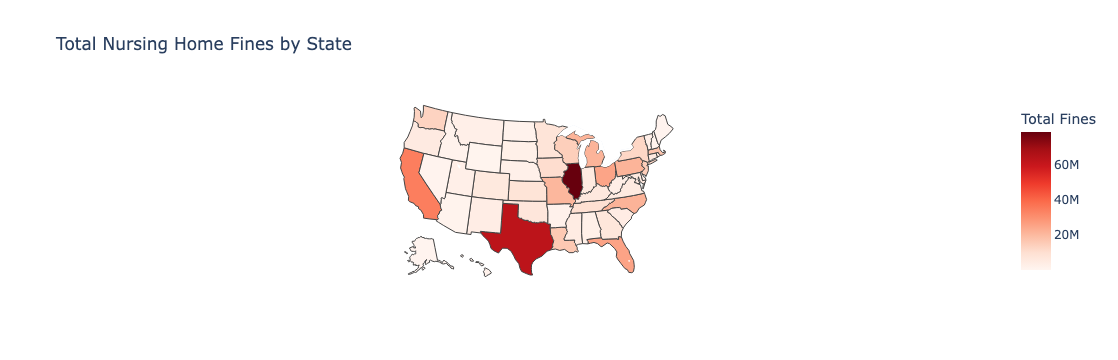

In [59]:
import plotly.express as px
state_data = state_summary.reset_index()

fig = px.choropleth(state_data,locations="State",locationmode="USA-states",color="total_fine",color_continuous_scale="Reds",scope="usa",labels={"total_fine": "Total Fines"},title="Total Nursing Home Fines by State")

fig.show()


### Visualization 1 Explanation

Our first visualization goes off of our first insight, which shows the distribution of penalty fines by state. We decided to go with a choropleth for this visualization because it is the best option to give a quick glance understanding of this distribution. From this visualization, we can clearly see that Illinois is the state with the most fines. 

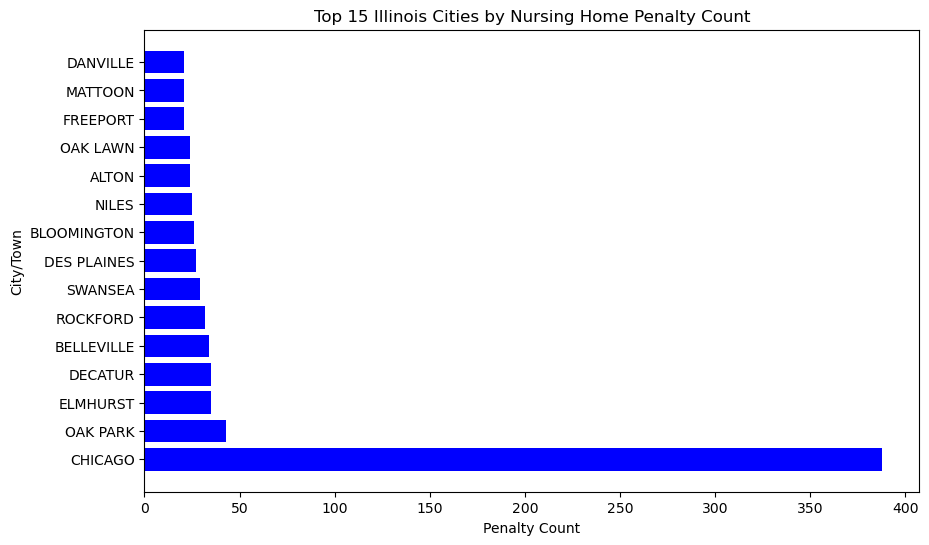

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_il_penalties_bar(penalties_path):
    df = pd.read_csv(penalties_path)
    il_df = df[df["State"] == "IL"].copy()

    il_df["City/Town"] = (il_df["City/Town"].astype(str).str.upper().str.replace(r"[^A-Z\s]", "", regex=True).str.strip())
    city_counts = (il_df.groupby("City/Town").size().reset_index(name="Penalty Count").sort_values("Penalty Count", ascending=False))
    top_cities = city_counts.head(15)

    plt.figure(figsize=(10, 6))
    plt.barh(top_cities["City/Town"], top_cities["Penalty Count"], color="blue")
    plt.title("Top 15 Illinois Cities by Nursing Home Penalty Count")
    plt.xlabel("Penalty Count")
    plt.ylabel("City/Town")
    
    plt.show()

visualize_il_penalties_bar("NH_Penalties_Cleaned.csv")


### Visualization 2 Explanation

Our second visualization builds off our second insight by showing the distribution of different cities within Illinois and their associated penalty counts. We chose to use a barchart because it gives quick visual into the difference in amount of penalties between different cities. From this visualization we can see Chicago has the most penalties by far. 

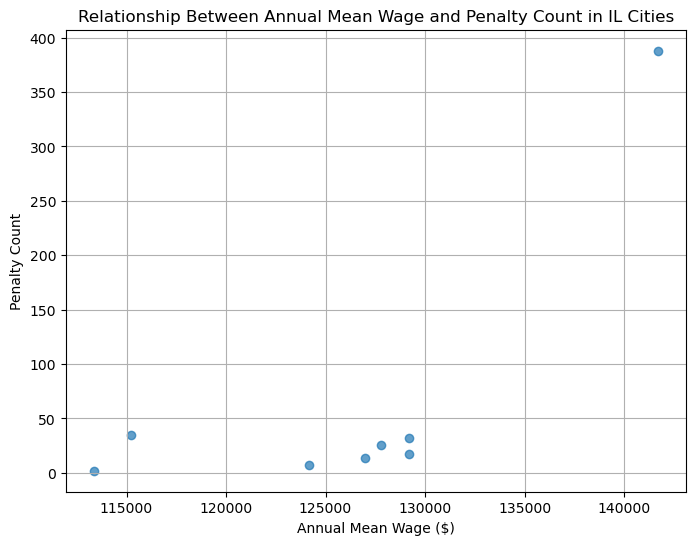

In [51]:
import matplotlib.pyplot as plt

def visualize_insight3(merged):
    plt.figure(figsize=(8,6))
    plt.scatter(merged["Annual mean wage (2)"], merged["Penalty Count"], alpha=0.7)
    plt.title("Relationship Between Annual Mean Wage and Penalty Count in IL Cities")
    plt.xlabel("Annual Mean Wage ($)")
    plt.ylabel("Penalty Count")
    plt.grid(True)
    plt.show()
visualize_insight3(merged)



### Visualization 3 Explanation

Our final visualization connects the insights we have had about the state of Illinois and the locations of its nursing homes to the different economic factors that we can compare it to for either supporting or opposing our hypothesis. We decided to look at different cities where nursing homes are located and see the penalty counts in each city and its associated annual mean wage. From this visualization, we can see that it supports our hypothesis a little, seeing that higher annual mean wage areas have lower penalty counts. However, it also doesn't fully support our hypothesis because the lower annual mean wage areas also have lower penalty counts. 

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
